# Initial EDA - Normal operating conditions (dataset 00)

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
pyo.init_notebook_mode(connected=True)

# import plotly_express as px

from ipywidgets import interact

In [2]:
import missingno as msno

In [3]:
file = 'd00'

In [4]:
# Reading files
d00_test = pd.read_csv('../data/'+file+'.dat', sep='\s+', header=None).T
d00_train = pd.read_csv('../data/'+file+'_te.dat', sep='\s+', header=None)

# Renaming columns (columns as integers is not good)
d00_test.columns = ['f'+str(i) for i in range(0,52)]
d00_train.columns = ['f'+str(i) for i in range(0,52)]

# Unifying dataset
d00 = pd.concat([d00_train, d00_test])

---
# Reproducing Belisário et al

### 1. Standardization

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.DataFrame(StandardScaler().fit_transform(d00_train), columns=d00_train.columns)

### 2. $\bar{X}$ vec

In [7]:
xbar = df.mean()

### 3. Cov matrix

In [8]:
df_cov = df.cov()

### 4. Eigenvectors (v) and Eigenvalues (w)

In [9]:
v,w = np.linalg.eig(df_cov)

### 5. Ranking values

In [10]:
df_rank = pd.DataFrame(w)
df_rank['autovalues'] = v
# df_rank['autovectors'] = [v]
df_rank = df_rank[['autovalues'] +list(df_rank.columns.drop('autovalues'))]
df_ranked = df_rank.sort_values('autovalues', ascending=False)
df_ranked['percent_explained_var'] = df_ranked['autovalues']/df_ranked['autovalues'].sum()

In [11]:
data = [go.Scatter(x = df_ranked.index+1, y = np.cumsum(df_ranked['percent_explained_var']), name = 'cumsum')]
layout = go.Layout(title = 'Cumsum of explained variance',
                   yaxis = dict(title = 'Explained variance (%)'),
                   xaxis = dict(title = 'Number of principal components'))
fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig, config=dict(showLink = False))

The threshold chosen by _Belisário et al._ was 55%, without any explanations presented. Therefore the number of PC's selected for the model is 11.

### 7. Reduction of dimentionalities

In [12]:
df_ranked.drop('autovalues',1).drop('percent_explained_var',1)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.113397,-0.158270,0.216763,-0.142510,-0.391054,0.294943,-0.049004,0.006120,-0.043989,0.019978,...,0.013713,-0.003096,0.031851,0.042268,0.039804,0.702271,0.046386,-0.001767,1.529373e-04,-2.894070e-05
1,-0.003605,0.102622,0.346324,0.030183,0.135655,-0.191752,0.063509,-0.070879,-0.147936,0.143243,...,0.001742,0.006880,-0.012905,0.001092,-0.011134,0.001240,0.000771,0.000094,-6.393235e-06,4.303883e-08
2,0.128755,0.032141,-0.018058,0.088915,0.059560,-0.028122,-0.040051,-0.093088,-0.189385,-0.262861,...,0.006527,0.002914,-0.002069,0.005415,0.001803,-0.001659,0.004537,-0.000527,-4.322315e-06,3.861478e-06
3,0.031727,0.116225,-0.005330,-0.024818,-0.030561,0.034087,0.025684,0.069515,0.300379,0.427409,...,0.046128,0.004319,0.010757,0.005290,-0.011082,-0.001560,-0.000622,0.002430,1.109424e-05,1.158008e-05
4,0.005752,0.015313,-0.026937,0.053273,-0.004758,0.124798,0.045853,0.006963,0.038114,-0.037407,...,-0.131572,0.012935,-0.022296,0.025389,-0.040155,0.000813,-0.006098,0.000449,8.892340e-06,-1.536388e-06
5,-0.030016,0.056590,0.049124,-0.004817,-0.039855,0.024390,-0.017791,-0.043392,-0.053733,0.330239,...,0.026899,-0.008642,-0.005848,-0.001637,-0.004218,0.001618,0.002418,0.000140,-1.012712e-06,-3.742255e-06
6,0.336565,0.052548,0.070066,-0.019121,-0.122175,0.082373,-0.041575,-0.038586,0.090399,-0.033175,...,-0.002911,0.007765,-0.052337,0.142439,-0.363168,-0.031926,0.737393,-0.001912,1.184929e-04,-4.794598e-05
7,0.061668,-0.064813,-0.003977,-0.013424,0.053433,0.043172,0.030415,-0.025382,-0.234936,-0.159169,...,-0.010027,0.001781,-0.002486,-0.001833,0.002000,0.001336,0.002854,-0.000249,-6.411855e-06,-4.171133e-06
8,0.006853,0.064834,0.419097,0.001538,0.044391,-0.106101,0.030325,-0.026737,0.099330,-0.136968,...,-0.005034,-0.014520,0.007147,-0.001912,0.002093,-0.000529,-0.002067,-0.001371,8.146497e-06,-1.002729e-05
9,-0.153895,0.075754,-0.054812,0.140963,-0.100421,-0.109384,-0.102611,-0.591808,0.086880,0.075783,...,-0.081410,-0.694586,-0.028076,0.009604,0.007958,0.000430,-0.003614,0.000676,1.341722e-05,3.492855e-05


In [13]:
explained_variance

NameError: name 'explained_variance' is not defined

###  Determining LCS and 

In [14]:
%load_ext rpy2.ipython

R[write to console]: During startup - 
R[write to console]: Warning message:

R[write to console]: Setting LC_TIME failed, using "C" 



In [15]:
%R require(Hotelling)

R[write to console]: Loading required package: Hotelling

R[write to console]: Loading required package: corpcor



array([1], dtype=int32)

In [16]:
%R HotellingsT2(w)

R[write to console]: Error in HotellingsT2(w) : could not find function "HotellingsT2"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in HotellingsT2(w) : could not find function "HotellingsT2"
Calls: <Anonymous> -> <Anonymous> -> withVisible


---

### Sklearn PCA solution

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)

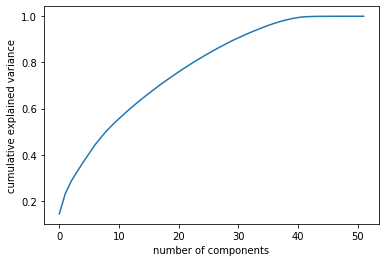

In [19]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
sum(pca.explained_variance_ratio_)

1.0

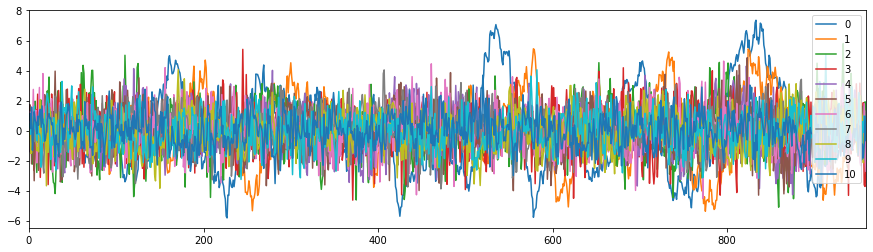

In [22]:
principalDf.plot(figsize = (15,4));

---

## T2

$T^2$ is a scalar number that summarizes all the score values. The $T^2$ value for the $i^{th}$ observation is defined as:
$$T^2 = \Sigma^{a=A}_{a = 1}\Big(\frac{t_{i,a}}{s_a}\Big)^2$$
Where the $s^2_a$ values are constants, and are the variances of each component. A is the component of the PCA model.

## Distributions

In [16]:
@interact(x = d00.columns)

def f(x):
    sns.distplot(d00[[x]])
    plt.title(x)
    plt.show()

interactive(children=(Dropdown(description='x', options=('f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',…